In [ ]:
import nibabel as nib
import numpy as np, os
import matplotlib.pyplot as plt

path ='../is0001-is0154_mask_and_image/'
data_list = sorted(os.listdir(path))

In [ ]:
def plot_slices(num_rows, num_columns, width, height, data):
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    maxv, minv = np.max(data), np.min(data) # define the grey scale
    print(image.shape)
    print(maxv,minv)
#     maxv, minv = np.percentile(image,99), np.percentile(image,2)
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(rows_data,columns_data,figsize=(fig_width, fig_height),
                            gridspec_kw={"height_ratios": heights},)
    cm=plt.cm.get_cmap('gray')
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap = cm, vmin = minv, vmax = maxv)
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()

In [ ]:
# load nii and show
from matplotlib import colors
import matplotlib as mpl
from matplotlib.colors import Normalize
def normalize(volume):
    volume = np.divide(volume, np.percentile(volume,98))
    volume = volume.astype("float32")
    return volume

# for i in range(0,5,2):
# #     load nii start
#     load = path +data_list[i]
#     image = nib.load(load)
#     image = image.get_fdata()
# #     image = normalize(image)
#     norm = mpl.colors.Normalize(np.min(image),np.max(image),clip=False)
# #     print(image)
#     image = norm(image)
# #     print(image)
# #     load nii end
# #     plot_slices(4, 5, image.shape[0], image.shape[1], image[:,:,0:20])

In [28]:
load = path +data_list[0]
image = nib.load(load)
image = image.get_fdata()

In [60]:
one_mir_slice = image[...,0]
print(np.max(one_mir_slice))

1498.0


In [61]:
from keras import backend as K
flatten_image = K.flatten(one_mir_slice)

In [62]:
list_image= np.array(flatten_image).tolist()

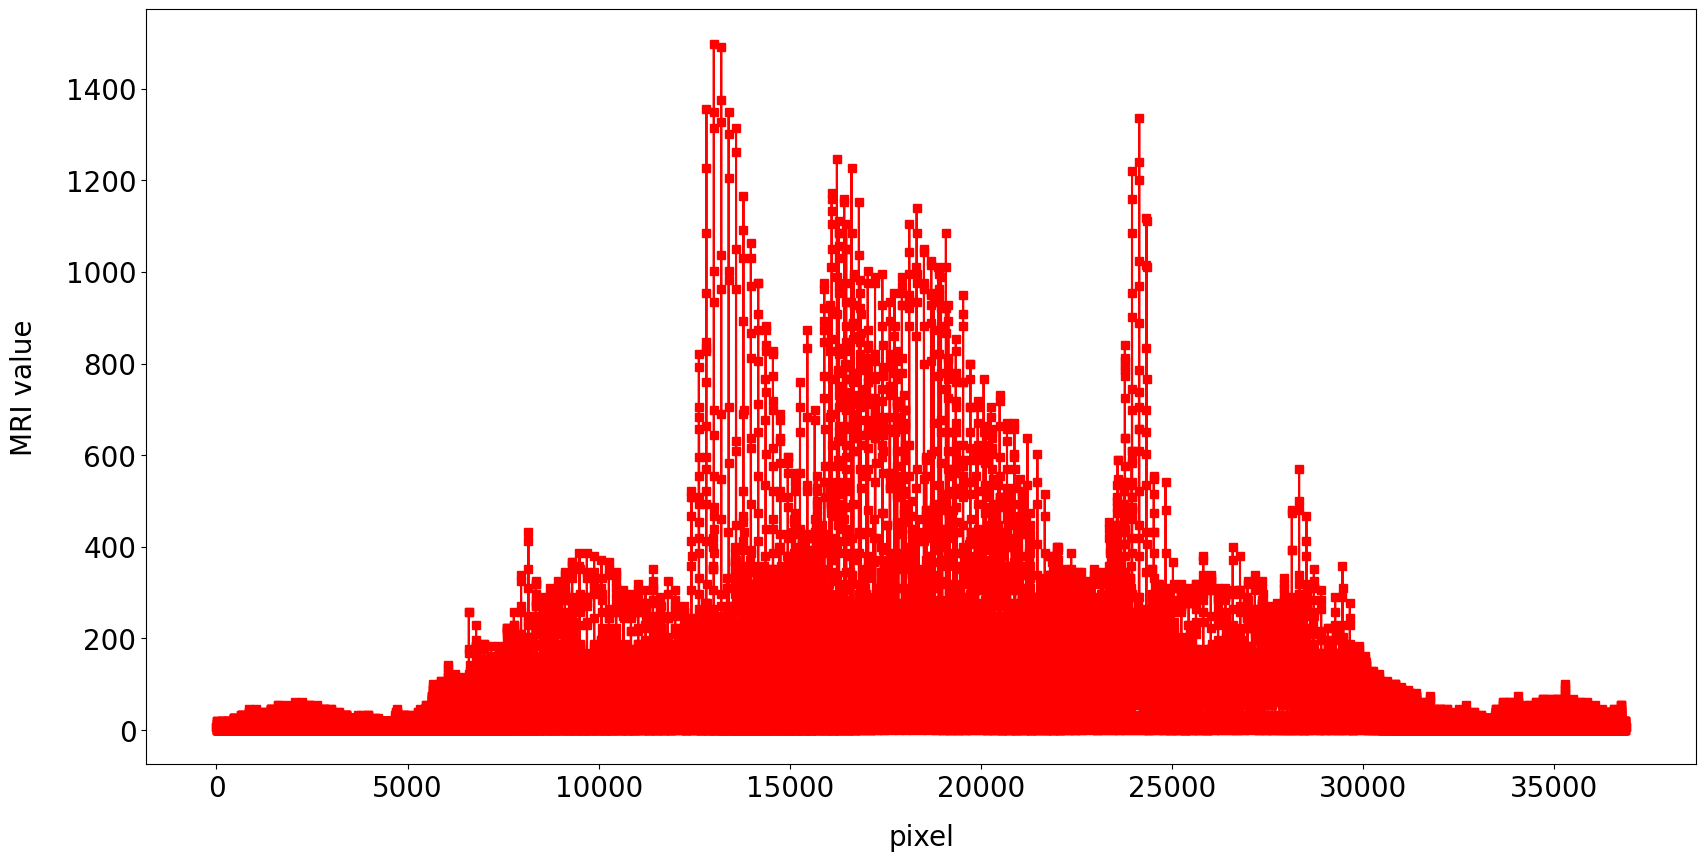

In [65]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.figure(figsize=(20,10),dpi=100,linewidth = 2)
plt.plot(flatten_image,'s-',color = 'r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("pixel", fontsize=20, labelpad = 15)

plt.ylabel("MRI value", fontsize=20, labelpad = 20)
plt.show()